<a href="https://colab.research.google.com/github/pmantramurti/CMPE257-Fall23-Pranay-Mantramurti/blob/homework/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def symmCalc(row):
  image = np.array(row[1:257]).reshape(16,16)
  left = image[:,:8]
  right = np.fliplr(image[:,8:16])
  symmDiff = np.abs(left-right)
  return (np.sum(symmDiff)/(16*8))

#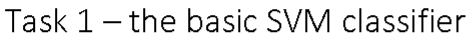

##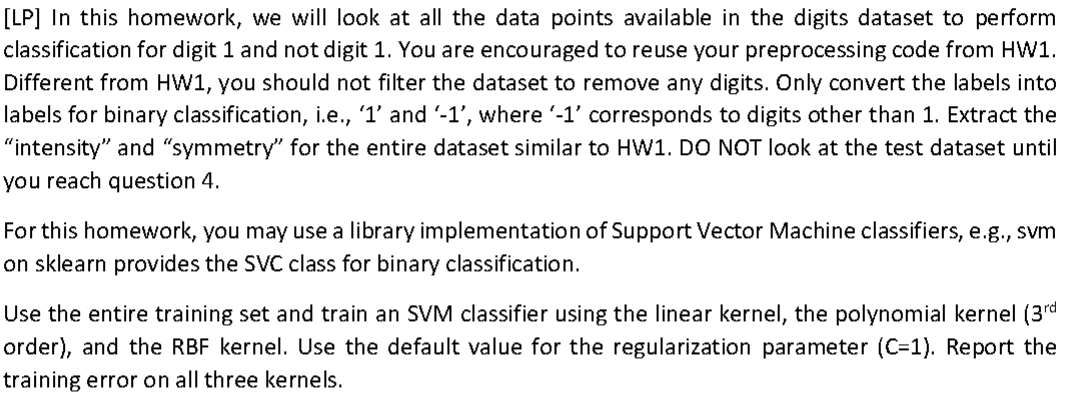

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ZipDigits/ZipDigits.train', header=None, delimiter=' ')
for i in range(1,10):
  if i != 1:
    df_train[0] = df_train[0].replace(i, -1)

df_train = df_train.drop(257, axis=1)
df_train_alt = pd.DataFrame()

df_train_alt['intensity'] = df_train.mean(axis=1)

df_train_alt['symmetry'] = df_train.apply(symmCalc, axis=1)
df_train_alt['bias'] = 1

df_train_alt['y'] = df_train[0]
df_train_alt.head(1)

,intensity,symmetry,bias,y
0,-0.320471,0.379211,1,-1.0


In [5]:
from sklearn import svm
from sklearn.metrics import accuracy_score

kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
  svc = svm.SVC(kernel=kernel, C=1)
  svc.fit(df_train_alt[['intensity', 'symmetry']], df_train_alt['y'])
  svc_train_predictions = svc.predict(df_train_alt[['intensity', 'symmetry']])
  svc_train_error = 1 - accuracy_score(df_train_alt['y'], svc_train_predictions)
  print(kernel, 'kernel training error = ', svc_train_error)

linear kernel training error =  0.10835276368125091
poly kernel training error =  0.1087642298724455
rbf kernel training error =  0.10725552050473186


##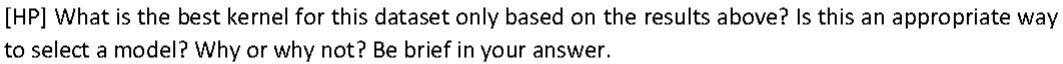

Based solely on the results above, I would say that the rbf kernel is the one best suited to this dataset. However, this is not the best way to select a model because we don't know if the model is over or underfitting without seeing the accuracy or error of the model on a test set, or doing some kind of cross validation on it.

#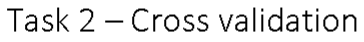

##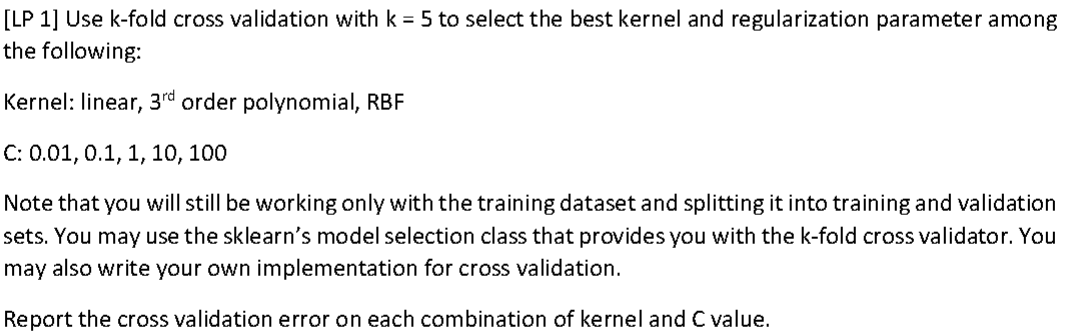

In [6]:
from sklearn.model_selection import cross_val_score

Cs = [0.01, 0.1, 1, 10, 100]

cross_err = np.zeros((len(Cs), len(kernels)))
sample_err = np.zeros((len(Cs), len(kernels)))

c_ind = 0
for c in Cs:
  print('C =', c)
  k_ind = 0
  for kernel in kernels:
    svc = svm.SVC(kernel=kernel, C=c)
    svc_cross_score = cross_val_score(svc, df_train_alt[['intensity', 'symmetry']], df_train_alt['y'], cv=5)
    svc_cross_error = 1 - svc_cross_score.mean()
    print('  ', kernel, 'kernel training error = ', svc_cross_error)
    svc.fit(df_train_alt[['intensity', 'symmetry']], df_train_alt['y'])
    svc_train_predictions = svc.predict(df_train_alt[['intensity', 'symmetry']])
    svc_train_error = 1 - accuracy_score(df_train_alt['y'], svc_train_predictions)
    cross_err[c_ind][k_ind] = svc_cross_error
    sample_err[c_ind][k_ind] = svc_train_error
    k_ind += 1
  c_ind += 1

C = 0.01
   linear kernel training error =  0.3016047220271322
   poly kernel training error =  0.13249251841133647
   rbf kernel training error =  0.14511104153680243
C = 0.1
   linear kernel training error =  0.11822818680889902
   poly kernel training error =  0.11260545443775971
   rbf kernel training error =  0.10862787240823946
C = 1
   linear kernel training error =  0.10903948906132044
   poly kernel training error =  0.1105485934237237
   rbf kernel training error =  0.10766802900684558
C = 10
   linear kernel training error =  0.10917675729190468
   poly kernel training error =  0.11000017863673839
   rbf kernel training error =  0.10807973967926243
C = 100
   linear kernel training error =  0.10876542269683187
   poly kernel training error =  0.10931449561916895
   rbf kernel training error =  0.1084914503516794


##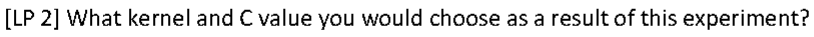

I would  choose the rbf kernel with a C value of 1.

##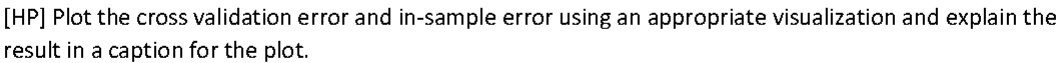

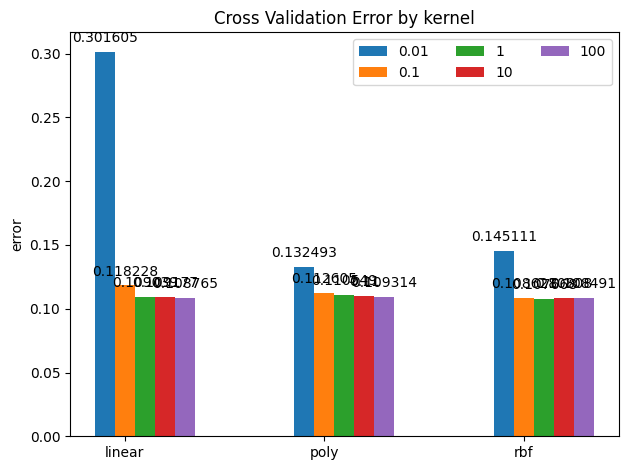

In [7]:
fig, ax = plt.subplots()

x = np.arange(len(kernels))
bar_width = 0.1
multiplier = 0

for i in range(len(Cs)):
  attribute = Cs[i]
  measurement = cross_err[i]
  offset = bar_width*multiplier
  rects = ax.bar(x + offset, measurement, bar_width, label=attribute)
  ax.bar_label(rects, padding=5)
  multiplier += 1

ax.set_ylabel('error')
ax.set_title('Cross Validation Error by kernel')
ax.set_xticks(x + bar_width, kernels)
#plt.xticks([])
ax.legend(loc='upper right', ncols=3)

plt.tight_layout()
plt.show()

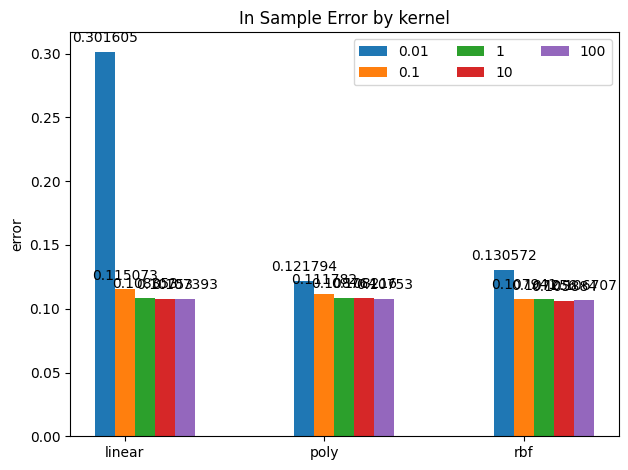

In [8]:
fig, ax = plt.subplots()

x = np.arange(len(kernels))
bar_width = 0.1
multiplier = 0

for i in range(len(Cs)):
  attribute = Cs[i]
  measurement = sample_err[i]
  offset = bar_width*multiplier
  rects = ax.bar(x + offset, measurement, bar_width, label=attribute)
  ax.bar_label(rects, padding=5)
  multiplier += 1

ax.set_ylabel('error')
ax.set_title('In Sample Error by kernel')
ax.set_xticks(x + bar_width, kernels)
#plt.xticks([])
ax.legend(loc='upper right', ncols=3)

plt.tight_layout()
plt.show()

#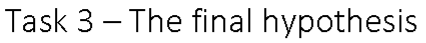

##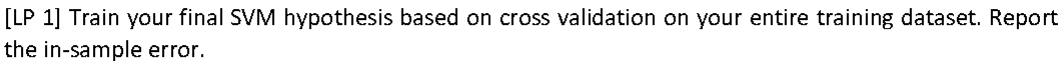

In [9]:
svc = svm.SVC(kernel='rbf', C=1)
svc.fit(df_train_alt[['intensity', 'symmetry']], df_train_alt['y'])
svc_train_predictions = svc.predict(df_train_alt[['intensity', 'symmetry']])
svc_train_error = 1 - accuracy_score(df_train_alt['y'], svc_train_predictions)
print('Kernel = RBF, C = 1, training error = ', svc_train_error)

Kernel = RBF, C = 1, training error =  0.10725552050473186


##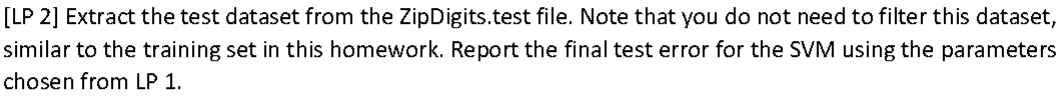

In [10]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ZipDigits/ZipDigits.test', header=None, delimiter=' ')
for i in range(1, 10):
  if i != 1:
    df_test[0] = df_test[0].replace(i, -1)

df_test = df_test.drop(257, axis=1)

df_test_alt = pd.DataFrame()
df_test_alt['intensity'] = df_test.mean(axis=1)

df_test_alt['symmetry'] = df_test.apply(symmCalc, axis=1)
df_test_alt['bias'] = 1

df_test_alt['y'] = df_test[0]
df_test_alt.head(1)

,intensity,symmetry,bias,y
0,-0.457763,0.519883,1,-1.0


In [11]:
svc_test_predictions = svc.predict(df_test_alt[['intensity', 'symmetry']])
svc_test_error = 1 - accuracy_score(df_test_alt['y'], svc_test_predictions)
print('Kernel = RBF, C = 1, Test error = ', svc_test_error)

Kernel = RBF, C = 1, Test error =  0.12655705032386644


#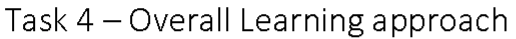

##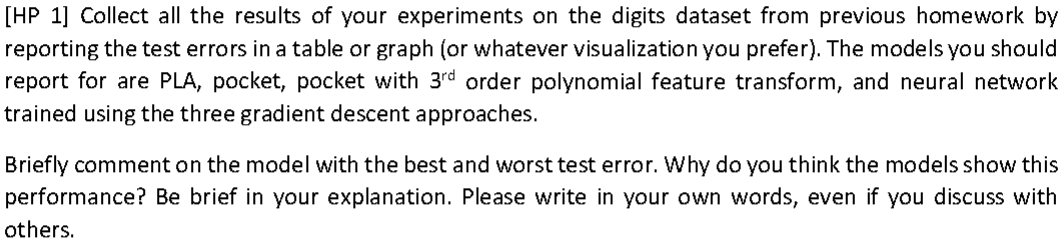

###PLA Algorithm

In [12]:
def getSign(x):
  if x < 0:
    return -1
  if x >= 0:
    return 1

def getDot(w, i, df):
  ans = np.dot(w, df[['bias', 'intensity', 'symmetry']].iloc[i])
  return ans

def adjustWeights(w, i, df, n, s):
  yAdj = n*(df['y'][i] - s)
  w2 = np.array(w) + np.array(df[['bias', 'intensity', 'symmetry']].iloc[i])*yAdj
  return w2

def PLA(df, n):
  w = [1,0,0]
  accurate = False
  updates = 0
  out_err = 0
  while not accurate and updates < 10000 :
    if updates%1000 == 0:
      print('Updates :', updates, ', Score :', out_err)
    updates += 1
    accurate = True
    i = random.randrange(0, df.shape[0])
    s = getDot(w, i, df)
    if s*df['y'][i] <= 0:
      w = adjustWeights(w, i, df, n, s)
    out = np.dot(w, np.transpose(df[['bias', 'intensity', 'symmetry']]))
    out_err = np.sum(np.array(out)*np.array(df_train_alt['y']))
    if out_err != df.shape[0]:
      accurate = False
  return w

###Pocket

In [13]:
def Pocket(df, n):
  w = [1,0,0]
  wFin = w.copy()
  mistakes = 0
  minMistakes = 0
  accurate = False
  updates = 0
  while not accurate and updates < 10000 :
    if updates%1000 == 0:
      print('Updates :', updates, ', Score :', minMistakes)
    updates += 1
    accurate = True
    i = random.randrange(0, df.shape[0])
    s = getDot(w, i, df)
    if s*df['y'][i] <= 0:
      w = adjustWeights(w, i, df, n, s)

    out = np.dot(w, np.transpose(df[['bias', 'intensity', 'symmetry']]))
    mistakes = np.sum(np.array(out)*np.array(df_train_alt['y']))
    if mistakes != df.shape[0]:
      accurate = False
    if mistakes > minMistakes:
      minMistakes = mistakes
      wFin = w.copy()
    mistakes = 0
  return wFin

###Pocket 3rd

In [14]:
def order3rd(df):
  df['is'] = np.array(df['intensity'])*np.array(df['symmetry'])
  df['i^2'] = np.array(df['intensity']) ** 2
  df['s^2'] = np.array(df['symmetry']) ** 2
  df['is^2'] = np.array(df['intensity'])*np.array(df['symmetry'])*np.array(df['symmetry'])
  df['i^2s'] = np.array(df['intensity'])*np.array(df['intensity'])*np.array(df['symmetry'])
  df['i^3'] = np.array(df['intensity']) ** 3
  df['s^3'] = np.array(df['symmetry']) ** 3
  return df

def getDot3rd(w, i, df):
  ans = np.dot(w, df[['bias', 'intensity', 'symmetry', 'is', 'i^2', 's^2', 'is^2', 'i^2s', 'i^3', 's^3']].iloc[i])
  return ans

def adjustWeights3rd(w, i, df, n, s):
  yAdj = n*(df['y'][i] - s)
  w2 = np.array(w) + np.array(df[['bias', 'intensity', 'symmetry', 'is', 'i^2', 's^2', 'is^2', 'i^2s', 'i^3', 's^3']].iloc[i])*yAdj
  return w2

def Pocket3rd(df, n):
  w = [0]*10
  wFin = [0]*10
  mistakes = 0
  minMistakes = 0
  accurate = False
  updates = 0
  while not accurate and updates < 10000 :
    if updates%1000 == 0:
      print('Updates :', updates, ', Score :', minMistakes)
    updates += 1
    accurate = True
    i = random.randrange(0, df.shape[0])
    s = getDot3rd(w, i, df)
    if s*df['y'][i] <= 0:
      w = adjustWeights3rd(w, i, df, n, s)

    out = np.dot(w, np.transpose(df[['bias', 'intensity', 'symmetry', 'is', 'i^2', 's^2', 'is^2', 'i^2s', 'i^3', 's^3']]))
    mistakes = np.sum(np.array(out)*np.array(df_train_alt['y']))
    if mistakes != df.shape[0]:
      accurate = False
    if mistakes > minMistakes:
      minMistakes = mistakes
      wFin = w.copy()
    mistakes = 0

  return wFin

###Neural Network

In [15]:
#Neural Network
class Layer:
  def __init__(self, weights = None, values = None, gradients = None):
    if gradients is not None:
      self.gradients = gradients
    else:
      self.weights = weights
      self.values = values
      self.delta = np.zeros_like(self.values)

def init_Network(d, hidden_layers):#d = [Input units, hidden units, output units], ex : [2, m, 1]
  network = []
  network.append(Layer(np.random.rand(d[1], d[0] + 1), np.zeros(d[1])))
  for i in range(hidden_layers - 1):
    network.append(Layer(np.random.rand(d[1], d[1] + 1), np.zeros(d[1])))
  network.append(Layer(np.random.rand(d[2], d[1] + 1), np.zeros(d[2])))
  return network

def neuron_activation(input, weight):
  temp_w = np.delete(weight.copy(), -1, axis=1)
  bias = np.array(weight[:, -1])
  out = np.dot(temp_w, input)
  out += np.transpose(bias)
  out = np.tanh(out)
  return out

def forward_propagation(network, input, expected_output, sample_size):
  result = [network.copy() for i in range(sample_size)]
  for sample in range(sample_size):
    result[sample][0].values = neuron_activation(np.array(input[sample]), np.array(result[sample][0].weights))
    for layer in range(1, len(result[0])):
      result[sample][layer].values = neuron_activation(np.array(result[sample][layer-1].values), np.array(result[sample][layer].weights))
  Error = 0
  for i in range(sample_size):
    Error += (result[i][-1].values[0] - expected_output[i])**2/sample_size
  return result, Error

def tanh_derivative(input):
  output = 1 - np.array(input)**2
  return output

def back_propagation(result, expected_output, sample_size):
  for sample in range(sample_size):
    exp_out = expected_output[sample]
    result[sample][-1].delta = [2*(result[sample][-1].values - expected_output[sample]) * tanh_derivative(result[sample][-1].values)]
    for layer in reversed(range(len(result[sample])-1)):
      prev_delta = np.array(result[sample][layer+1].delta)
      prev_weight = np.delete(np.array(result[sample][layer+1].weights).copy(), -1, axis=1)
      deriv_value = np.array(tanh_derivative(result[sample][layer].values))
      result[sample][layer].delta = np.array(prev_delta) * np.array(prev_weight) * np.array(deriv_value)
  return result

def update_weights(result, inputs, sample_size, learning_rate):
  fin_network = result[0].copy()
  for sample in range(sample_size):
    for layer in range(len(result[sample])):
      vals = []
      if layer == 0:
        vals = [np.append(inputs[sample].copy(), 1)]
      else:
        vals = [np.append(result[sample][layer - 1].values, 1)]
      fin_network[layer].weights -= learning_rate * np.transpose(result[sample][layer].delta) * np.array(vals) / sample_size
  return fin_network

def for_back_prop_grad_desc(d, num_hidden_layers, dataset, sample_size, iterations):
  network = init_Network(d, num_hidden_layers)
  counter = 0
  Error = []
  time_stamps = []
  threshold_base = 1e5
  threshold = 0
  while counter < iterations:
    data_sample = dataset.sample(sample_size)
    input = data_sample[['intensity', 'symmetry']].to_numpy()
    exp_out = data_sample[['y']].to_numpy()
    out, err = forward_propagation(np.array(network), input, exp_out, sample_size)
    result = back_propagation(np.array(out), exp_out, sample_size)
    network = update_weights(result, input, sample_size, learning_rate = 0.01)
    if counter >= threshold:
      print(counter, ' iterations, Error = ', err)
      threshold += threshold_base
    Error.append(err)
    time_stamps.append(counter)
    counter += sample_size
  return network, Error, time_stamps

def sign(value):
  if value > 0:
    return 1
  return -1
def test_sample(network, test_in, test_out):
  Error = 0
  size = len(test_in)
  counter = 0
  for sample in range(size):
    network[0].values = neuron_activation(np.array(test_in[sample]), np.array(network[0].weights))
    for layer in range(1, len(network)):
      network[layer].values = neuron_activation(np.array(network[layer-1].values), np.array(network[layer].weights))
    Error += (sign(network[-1].values[0]) - test_out[sample])**2/size
    if sign(network[-1].values[0]) != test_out[sample]:
      counter += 1
  return Error, (1 - counter/size)*100

###Test Models

In [16]:
n = 0.01
w = PLA(df_train_alt, n)
err = 0
for i in range(len(df_test_alt)):
  test_res = getSign(np.dot(w, df_test_alt[['bias', 'intensity', 'symmetry']].iloc[i]))
  if test_res != df_test_alt.y[i]:
    err += 1
PLA_err = err/len(df_test_alt)
print(PLA_err)

Updates : 0 , Score : 0
Updates : 1000 , Score : 400.80600610173224
Updates : 2000 , Score : 491.5459820998143
Updates : 3000 , Score : 482.25634812091414
Updates : 4000 , Score : 508.6175070128505
Updates : 5000 , Score : 497.8503991457816
Updates : 6000 , Score : 410.21299730310454
Updates : 7000 , Score : 476.33614872341803
Updates : 8000 , Score : 371.82521761239167
Updates : 9000 , Score : 441.57199327345654
0.2436472346786248


In [17]:
n = 0.01
w = Pocket(df_train_alt, n)
err = 0
for i in range(len(df_test_alt)):
  test_res = getSign(np.dot(w, df_test_alt[['bias', 'intensity', 'symmetry']].iloc[i]))
  if test_res != df_test_alt.y[i]:
    err += 1
Pocket_err = err/len(df_test_alt)
print(Pocket_err)

Updates : 0 , Score : 0
Updates : 1000 , Score : 494.2226577344685
Updates : 2000 , Score : 548.5741183818866
Updates : 3000 , Score : 553.2763022625936
Updates : 4000 , Score : 622.0953199304204
Updates : 5000 , Score : 622.0953199304204
Updates : 6000 , Score : 622.0953199304204
Updates : 7000 , Score : 622.0953199304204
Updates : 8000 , Score : 622.0953199304204
Updates : 9000 , Score : 622.0953199304204
0.24813153961136025


In [18]:
n = 0.01
df_train_3rd = order3rd(df_train_alt)
df_test_3rd = order3rd(df_test_alt)
w = Pocket3rd(df_train_3rd, n)
err = 0
for i in range(len(df_test_3rd)):
  test_res = getSign(np.dot(w, df_test_3rd[['bias', 'intensity', 'symmetry', 'is', 'i^2', 's^2', 'is^2', 'i^2s', 'i^3', 's^3']].iloc[i]))
  if test_res != df_test_3rd.y[i]:
    err += 1
Pocket3rd_err = err/len(df_test_3rd)
print(Pocket3rd_err)

Updates : 0 , Score : 0
Updates : 1000 , Score : 199.1005765952691
Updates : 2000 , Score : 236.3348645001327
Updates : 3000 , Score : 236.3348645001327
Updates : 4000 , Score : 236.3348645001327
Updates : 5000 , Score : 252.15330044646802
Updates : 6000 , Score : 262.6831803441156
Updates : 7000 , Score : 273.83175608911404
Updates : 8000 , Score : 273.83175608911404
Updates : 9000 , Score : 273.83175608911404
0.31041355256601894


In [19]:
iterations = 2e6
m = 2
d = [2, m, 1]
hidden_layers = 1
sample_size = 1
network1, error1, time1 = for_back_prop_grad_desc(d, hidden_layers, df_train_alt, sample_size, iterations)

df_in = df_test_alt[['intensity', 'symmetry']].to_numpy()
df_out = df_test_alt[['y']].to_numpy()
NN1_err, accuracy1 = test_sample(network1, df_in, df_out)
print(NN1_err)

0  iterations, Error =  [3.84225946]
100000  iterations, Error =  [0.66348072]
200000  iterations, Error =  [8.237169e-05]
300000  iterations, Error =  [0.00050555]
400000  iterations, Error =  [0.00138995]
500000  iterations, Error =  [0.49722413]
600000  iterations, Error =  [0.00487952]
700000  iterations, Error =  [0.01162854]
800000  iterations, Error =  [0.83767401]
900000  iterations, Error =  [5.34739002e-06]
1000000  iterations, Error =  [6.00070744e-06]
1100000  iterations, Error =  [0.12288475]
1200000  iterations, Error =  [1.81220974]
1300000  iterations, Error =  [0.00013352]
1400000  iterations, Error =  [0.00177815]
1500000  iterations, Error =  [0.53119506]
1600000  iterations, Error =  [2.39952179]
1700000  iterations, Error =  [0.00118115]
1800000  iterations, Error =  [0.91615161]
1900000  iterations, Error =  [0.02083965]
[0.3064275]


In [20]:
iterations = 2e6
m = 2
d = [2, m, 1]
hidden_layers = 1
sample_size = 32
network32, error32, time32 = for_back_prop_grad_desc(d, hidden_layers, df_train_alt, sample_size, iterations)

NN32_err, accuracy32 = test_sample(network32, df_in, df_out)
print(NN32_err)

0  iterations, Error =  [2.51564952]
100000  iterations, Error =  [0.42184666]
200000  iterations, Error =  [0.64172594]
300000  iterations, Error =  [0.44207079]
400000  iterations, Error =  [0.23662487]
500000  iterations, Error =  [0.11346873]
600000  iterations, Error =  [0.39097551]
700000  iterations, Error =  [0.62402485]
800000  iterations, Error =  [0.65298829]
900000  iterations, Error =  [0.50749606]
1000000  iterations, Error =  [0.84484118]
1100000  iterations, Error =  [0.21228863]
1200000  iterations, Error =  [0.71718095]
1300000  iterations, Error =  [0.50511291]
1400000  iterations, Error =  [0.42210995]
1500000  iterations, Error =  [0.77301086]
1600000  iterations, Error =  [0.65430021]
1700000  iterations, Error =  [0.55734061]
1800000  iterations, Error =  [0.75027084]
1900000  iterations, Error =  [0.58941876]
[0.30044843]


###Results

In [23]:
print('Model\t Error')
print()
print('PLA\t', PLA_err)
print('Pocket\t', Pocket_err)
print('Pock3rd\t', Pocket3rd_err)
print('NN1\t', NN1_err)
print('NN32\t', NN32_err)
print('SVC\t', svc_test_error)

Model	 Error

PLA	 0.2436472346786248
Pocket	 0.24813153961136025
Pock3rd	 0.31041355256601894
NN1	 [0.3064275]
NN32	 [0.30044843]
SVC	 0.12655705032386644


###Interpretation

Barring the SVC models, the model with the best performance based on error is PLA with an error of 0.2436, and the model with the worst performance based on error is 3rd order Pocket, with an error of 0.3104. I think the reason the models are performing so poorly is because the dataset contains one label that refers to one class, and a second label that refers to the rest of the classes, causing it to be harder for the program to differentiate the two, so models that worked on the filtered dataset will not work as well with the unfiltered dataset. The classes are less preciely defined, so programs like these that work based off clearly defined lines separating classes will suffer in terms of performance.

##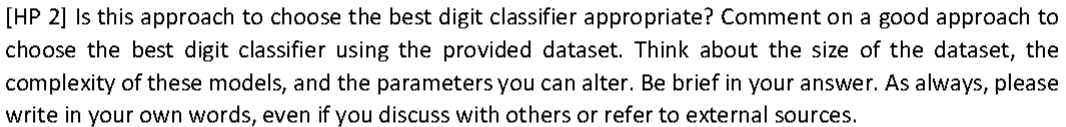

I would say that this approach is not appropriate. This is because I think that first, the most optimal arrangement of parameters should be found for each model, just as we did for the SVC in the previous tasks, as each should be judged in their most optimal state. I also think that the number of iterations should be scaled to the size of the dataset, since for example with PLA and Pocket, going with the version that was made for the assignments we first covered them in, in which they ran for 2k iterations, means skipping more than 2/3rds of the training dataset, causing underfitting, while on the other hand, the Neural Network from the gradient descent assignment runs for 2e6 iterations, which compared to the dataset of 7k entries seems to ensure overfitting.